<a href="https://colab.research.google.com/github/trduc97/CS985/blob/main/Classification_simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import libraries and datafiles

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Strathclyde/CS985_ML_for_Data_analysis/'
import os

# List files in the directory
os.chdir(path)
files = os.listdir(path)
print(files)

['CS98XClassificationTrain.csv', 'CS98XClassificationTest.csv', 'CS98XRegressionTest.csv', 'CS98XRegressionTrain.csv', 'y_true.csv', 'Classification_simplified.ipynb']


## 1.1. Importing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# default is 120 seconds
%autosave 60

Autosaving every 60 seconds


In [ ]:
import os

file_path = os.path.join(path, 'CS98XClassificationTrain.csv')
print(os.path.exists(file_path))


True


In [ ]:
train_set=pd.read_csv("CS98XClassificationTrain.csv")
test_set=pd.read_csv("CS98XClassificationTest.csv")

In [ ]:
# update the genres for the missing values
train_set.loc[train_set['title'] == 'Unchained Melody', 'top genre'] = 'pop'
train_set.loc[train_set['title'] == 'Someone Elses Roses', 'top genre'] = 'adult standards'
train_set.loc[train_set['title'] == 'Drinks On The House', 'top genre'] = 'pop'
train_set.loc[train_set['title'] == 'Pachuko Hop', 'top genre'] = 'blues'
train_set.loc[train_set['title'] == 'Little Things Means A Lot', 'top genre'] = 'blues'
train_set.loc[train_set['title'] == 'The Lady Is A Tramp', 'top genre'] = 'pop'
train_set.loc[train_set['title'] == 'If I Give My Heart To You', 'top genre'] = 'pop'
train_set.loc[train_set['title'] == 'Happy Days And Lonely Nights','top genre'] = 'rock'
train_set.loc[train_set['title'] == 'Stairway Of Love','top genre'] = 'rock'
train_set.loc[train_set['title'] == 'You', 'top genre'] = 'pop'
train_set.loc[train_set['title'] == 'No Other Love' , 'top genre'] = 'adult standards'
train_set.loc[train_set['title'] == "Hot Diggity" , 'top genre'] = 'folk'
train_set.loc[train_set['title'] == "Ain't That Just the Way" , 'top genre'] = 'r&b'
train_set.loc[train_set['title'] == "I Promised Myself" , 'top genre'] = 'pop'
# dropping NULL values  (I've Waited So Long Anthony Newley = ? (Dance/ Electronic))
train_set = train_set.dropna(axis=0)
# check again for null values
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         452 non-null    int64 
 1   title      452 non-null    object
 2   artist     452 non-null    object
 3   year       452 non-null    int64 
 4   bpm        452 non-null    int64 
 5   nrgy       452 non-null    int64 
 6   dnce       452 non-null    int64 
 7   dB         452 non-null    int64 
 8   live       452 non-null    int64 
 9   val        452 non-null    int64 
 10  dur        452 non-null    int64 
 11  acous      452 non-null    int64 
 12  spch       452 non-null    int64 
 13  pop        452 non-null    int64 
 14  top genre  452 non-null    object
dtypes: int64(12), object(3)
memory usage: 56.5+ KB


In [ ]:
train_set.rename(columns={'top genre': 'top_genre'}, inplace=True)
train_set.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,pop
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [ ]:
train_set['top_genre'].value_counts()[0:10]

adult standards       70
album rock            66
dance pop             61
glam rock             16
brill building pop    16
europop               14
dance rock            13
pop                   11
boy band              10
british invasion       8
Name: top_genre, dtype: int64

## 1.2. Dropping unnecessary columns

In [ ]:
train_set = train_set.drop(columns=['Id','title', 'artist'])
test_set = test_set.drop(columns=['Id','title', 'artist'])

In [ ]:
#set to True for data visualization and verbose text output
verbose=True

# 2. Data cleaning and exploration

## 2.1. Remove duplicate

In [ ]:
train_set = train_set.drop_duplicates()
len(train_set)

451

## 2.2. Feature enginerring

In [ ]:
# With the year range so long, ranging from 1948 to 2019, we can group the years into group of 5:

def assign_group(year):
    if 1948 <= year <= 1954:
        return 1
    else:
        return ((year - 1954)//5)+2

# Apply the calculation
train_set['year'] = train_set['year'].apply(assign_group)
test_set['year'] = test_set['year'].apply(assign_group)

## 2.3. Outliers handling

In [ ]:
'''
convert_feat = ['live','acous','spch','dur']
for feat in convert_feat:
    test_set[feat] = np.log(test_set[feat]+1)
'''

"\nconvert_feat = ['live','acous','spch','dur']\nfor feat in convert_feat:\n    test_set[feat] = np.log(test_set[feat]+1)\n"

## 2.4. Checking classes distribution

In [ ]:
value_counts=train_set["top_genre"].value_counts().sort_values(ascending=False)
value_counts[0:20]

adult standards         69
album rock              66
dance pop               61
glam rock               16
brill building pop      16
europop                 14
dance rock              13
pop                     11
boy band                10
british invasion         8
bubblegum dance          7
art rock                 7
disco                    7
deep adult standards     6
atl hip hop              6
eurodance                6
barbadian pop            6
classic soul             5
soft rock                5
british soul             5
Name: top_genre, dtype: int64

# 3. Preparing dataset for ML training

## 3.0. Splitting train and validation set

In [ ]:
# Splitting the data into features and target
y_clean = train_set['top_genre']
X_clean = train_set.drop(['top_genre'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    #stratify= y_clean,
    random_state=42
)

## 3.1. Features scaling

In [ ]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox

yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
X_train['acous'] = yeo_johnson_transformer.fit_transform(X_train[['acous']])
X_test['acous'] = yeo_johnson_transformer.transform(X_test[['acous']])
for col in ['spch', 'live', 'dur']:
    X_train[col], lambdas = boxcox(X_train[col]+1)
    X_test[col] = boxcox(X_test[col] +1, lmbda=lambdas)

In [ ]:
# Scale the dataset using robust scaler to mitigate the effect of outliers
robust_scaler = StandardScaler()

# Scaling the dataset while keeping the labels intact
columns_name = X_train.columns

# Scaling will return a ndarray so we will need to transform it back to a dataframe
X_train_scaled = robust_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= columns_name)

# Scaling the X_test
X_test_scaled = robust_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= columns_name)

## 3.2. Label encoding

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
y_train_encoded = label_encoder1.fit_transform(y_train)
'''

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoder1 = LabelEncoder()\ny_train_encoded = label_encoder1.fit_transform(y_train)\n'

# 4. Choosing model

In [ ]:
'''
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize recursive feature elimination with cross-validation (RFECV)
rfecv = RFECV(estimator=log, scoring='accuracy')

# Define hyperparameters for grid search
param_grid = {
    'estimator__C': [0.1, 1, 11],  # Regularization parameter
    'estimator__solver': ['liblinear', 'saga']  # Solver for logistic regression
}

# Initialize grid search
grid_search = GridSearchCV(estimator=rfecv, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit grid search to training data
grid_search.fit(X_scaled, y_label)

# Get the best estimator from grid search
best_rfecv = grid_search.best_estimator_

# Get selected feature indices
selected_feature_indices = best_rfecv.get_support(indices=True)
'''

"\nfrom sklearn.feature_selection import RFECV\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n# Initialize recursive feature elimination with cross-validation (RFECV)\nrfecv = RFECV(estimator=log, scoring='accuracy')\n\n# Define hyperparameters for grid search\nparam_grid = {\n    'estimator__C': [0.1, 1, 11],  # Regularization parameter\n    'estimator__solver': ['liblinear', 'saga']  # Solver for logistic regression\n}\n\n# Initialize grid search\ngrid_search = GridSearchCV(estimator=rfecv, param_grid=param_grid, scoring='accuracy', cv=5)\n\n# Fit grid search to training data\ngrid_search.fit(X_scaled, y_label)\n\n# Get the best estimator from grid search\nbest_rfecv = grid_search.best_estimator_\n\n# Get selected feature indices\nselected_feature_indices = best_rfecv.get_support(indices=True)\n"

## 4.0. Importing cleaned testing result

In [ ]:
y_test_true = pd.read_csv('y_true.csv',header = None, names=['top_genre'])
y_test_true

,top_genre
0,dance pop
1,glam rock
2,glam rock
3,big beat
4,appalachian folk
...,...
108,east coast hip hop
109,bubblegum dance
110,east coast hip hop
111,disco


## 4.1. Logistic regression

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

OVR_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
OVR_clf.fit(X_train_scaled, y_train)
y_ovr = OVR_clf.predict(X_test_scaled)
accuracy_ovr = accuracy_score(y_test, y_ovr)
accuracy_ovr

0.36283185840707965

## 4.2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC_model = RandomForestClassifier(n_estimators=400, max_depth=17, random_state=42)
RFC_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=17, n_estimators=400, random_state=42)

In [ ]:
y_rfc = RFC_model.predict(X_test_scaled)
accuracy_rfc = accuracy_score(y_test, y_rfc)
accuracy_rfc

0.3805309734513274

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rfc))

                      precision    recall  f1-score   support

      acoustic blues       0.00      0.00      0.00         1
     adult standards       0.50      0.67      0.57        21
            afrobeat       0.00      0.00      0.00         0
             afropop       0.00      0.00      0.00         1
          album rock       0.31      0.67      0.43        15
   alternative metal       0.00      0.00      0.00         2
            art rock       0.00      0.00      0.00         4
         atl hip hop       0.00      0.00      0.00         2
       barbadian pop       0.00      0.00      0.00         2
         baroque pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         1
         belgian pop       0.00      0.00      0.00         1
          blues rock       0.00      0.00      0.00         0
            boogaloo       0.00      0.00      0.00         1
  brill building pop       0.50      0.40      0.44         5
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## 4.3. XGBoost classification

### 4.3.1. label encoding on the training set

In [ ]:
# Splitting the data into features and target
X_train_full = train_set.drop(['top_genre'], axis=1)
y_train_full = train_set['top_genre']

In [ ]:
yeo_johnson_transformer_full = PowerTransformer(method='yeo-johnson')
X_train_full['acous'] = yeo_johnson_transformer_full.fit_transform(X_train_full[['acous']])
test_set['acous'] = yeo_johnson_transformer_full.transform(test_set[['acous']])
for col in ['spch', 'live', 'dur']:
    X_train_full[col], lambdas = boxcox(X_train_full[col]+1)
    test_set[col] = boxcox(test_set[col] +1, lmbda=lambdas)

In [ ]:
# Scale the dataset using robust scaler to mitigate the effect of outliers
standard_scaler = StandardScaler()

# Scaling the dataset while keeping the labels intact
columns_name = X_train_full.columns

# Scaling will return a ndarray so we will need to transform it back to a dataframe
X_train_full = standard_scaler.fit_transform(X_train_full)
X_train_full = pd.DataFrame(X_train_full, columns= columns_name)

# Scaling the test_set
X_test_full = standard_scaler.transform(test_set)
X_test_full = pd.DataFrame(X_test_full, columns= columns_name)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
y_train_full = label_encoder1.fit_transform(y_train_full)

### 4.3.2. Training model

In [ ]:
#pip install xgboost

In [ ]:
import xgboost as xgb

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train_full, y_train_full)

# Predict
y_pred = xgb_cl.predict(X_test_full)

# Inverse result
y_pred = label_encoder1.inverse_transform(y_pred)

# Score
accuracy_score(y_test_true, y_pred)

0.30973451327433627

## 4.4. Testing on full set Random Forest

### 4.4.1. Weighted Loss function

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Create and train the Random Forest model with class weights
RFC_model = RandomForestClassifier(n_estimators=400, max_depth=17, random_state=42,
                                  class_weight='balanced')

# Fit the model
RFC_model.fit(X_train_full, y_train_full)

RandomForestClassifier(class_weight='balanced', max_depth=17, n_estimators=400,
                       random_state=42)

In [ ]:
rfc_pred = RFC_model.predict(X_test_full)
rfc_pred = label_encoder1.inverse_transform(rfc_pred)
print(accuracy_score(y_test_true, rfc_pred))

0.35398230088495575


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_true, rfc_pred))

                      precision    recall  f1-score   support

     adult standards       0.56      0.76      0.64        25
          album rock       0.20      0.45      0.28        11
 alternative country       0.00      0.00      0.00         2
   alternative metal       0.00      0.00      0.00         1
    appalachian folk       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         2
         atl hip hop       0.00      0.00      0.00         0
       barbadian pop       0.00      0.00      0.00         1
         beach music       0.00      0.00      0.00         1
       belgian dance       0.00      0.00      0.00         0
            big beat       0.00      0.00      0.00         1
            big room       1.00      1.00      1.00         1
               blues       0.00      0.00      0.00         0
          blues rock       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         1
  brill

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
rfc_importances = RFC_model.feature_importances_
rfc_importances

array([0.07239398, 0.09839167, 0.11252511, 0.09036911, 0.07951485,
       0.09438085, 0.09991828, 0.10125131, 0.08964405, 0.06657209,
       0.09503869])

### 4.4.2. Re-labeling grouping based on naming convention

In [ ]:
# Decode to get string labels
y_train_full = label_encoder1.inverse_transform(y_train_full)

In [ ]:
# Make a new dataset
grouped_data = X_train_full.copy()
grouped_data['genre'] = y_train_full

In [ ]:
# grouping all subgenres to the most populated subgenre adult standards/album rock/dance pop
grouped_data['genre'] = grouped_data['genre'].apply(lambda x: 'album rock' if 'rock' in x.lower() else x)
grouped_data['genre'] = grouped_data['genre'].apply(lambda x: 'adult standards' if 'adult standards' in x.lower() else x)
grouped_data['genre'] = grouped_data['genre'].apply(lambda x: 'dance pop' if 'pop' in x.lower() else x)

In [ ]:
X_grouped = grouped_data.drop(['genre'], axis=1)
y_grouped = grouped_data['genre']
y_grouped = label_encoder1.transform(y_grouped)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Create and train the Random Forest model with class weights
RFC_model = RandomForestClassifier(n_estimators=400, max_depth=17, random_state=42,
                                  class_weight='balanced')

# Fit the model
RFC_model.fit(X_grouped, y_grouped)

RandomForestClassifier(class_weight='balanced', max_depth=17, n_estimators=400,
                       random_state=42)

In [ ]:
rfc_pred = RFC_model.predict(X_test_full)
rfc_pred = label_encoder1.inverse_transform(rfc_pred)
print(accuracy_score(y_test_true, rfc_pred))

0.3008849557522124


### 4.4.3. Grouping based on cosine similarity

In [ ]:
# Make a new dataset
grouped_data = X_train_full.copy()
grouped_data['genre'] = y_train_full

In [ ]:
# Calculating representative vector for
genres = [genre for genre in value_counts.index]

genre_vector =grouped_data.groupby('genre').mean().iloc[:,0:11]

In [ ]:
genre_vector_adjusted = genre_vector*rfc_importances

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Extract feature columns for similarity calculation
feature_columns = genre_vector_adjusted.columns[1:]

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(genre_vector_adjusted[feature_columns])

# Create a DataFrame from the similarity matrix
class_similarity_df = pd.DataFrame(similarity_matrix, index=genre_vector.index, columns=genre_vector_adjusted.index)

In [ ]:
top_genre = list(value_counts[0:12].index)
minor_genres = list(value_counts[12:].index)

<Axes: xlabel='genre', ylabel='genre'>

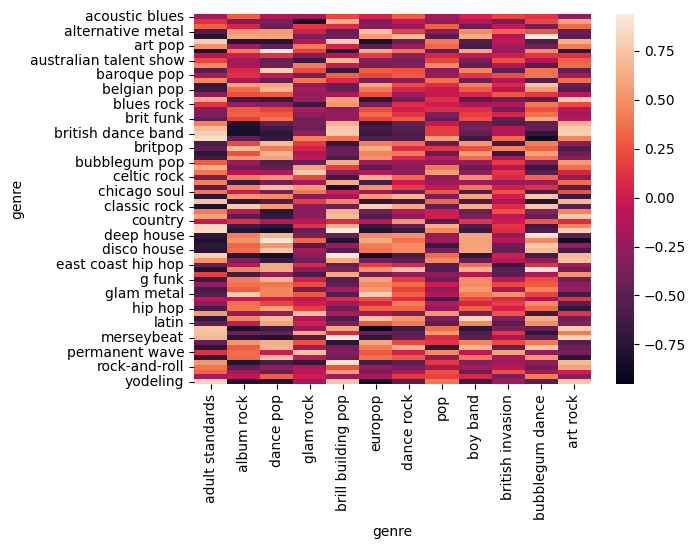

In [ ]:
# Display the resulting DataFrame
replace_mapping = class_similarity_df.drop(top_genre, axis=0)[top_genre]

sns.heatmap(replace_mapping)

In [ ]:
# Find the column with the highest value in each row
max_similarity_column = replace_mapping .idxmax(axis=1)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Class': replace_mapping .index, 'Max_Similarity_Column': max_similarity_column.values, 'Similarity_Value': replace_mapping .max(axis=1).values})

# Display the resulting DataFrame
result_df

,Class,Max_Similarity_Column,Similarity_Value
0,acoustic blues,album rock,0.297304
1,afrobeat,brill building pop,0.638871
2,afropop,art rock,0.340023
3,alternative metal,europop,0.713971
4,alternative rock,bubblegum dance,0.922568
...,...,...,...
71,rock,brill building pop,0.872802
72,rock-and-roll,art rock,0.576826
73,soft rock,brill building pop,0.547278
74,uk garage,bubblegum dance,0.417652


In [ ]:
replace_labels = result_df[result_df.Similarity_Value > 0.70]

In [ ]:
# Make a new dataset
grouped_data = X_train_full.copy()
grouped_data['genre'] = y_train_full
grouped_data['genre'] = grouped_data['genre'].replace(replace_labels.set_index('Class')['Max_Similarity_Column'])

In [ ]:
# Dropping genre with too littles sample
value_counts=grouped_data['genre'].value_counts()

drop_genre = value_counts[value_counts < 5].index.tolist()
grouped_data = grouped_data[~grouped_data['genre'].isin(drop_genre)]

In [ ]:
X_grouped = grouped_data.drop(['genre'], axis=1)
y_grouped = grouped_data['genre']
y_grouped = label_encoder1.transform(y_grouped)

In [ ]:
label_encoder2 = LabelEncoder()
y_grouped = label_encoder2.fit_transform(y_grouped)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Create and train the Random Forest model with class weights
RFC_model = RandomForestClassifier(n_estimators=400, max_depth=17, random_state=42,
                                  class_weight='balanced')

# Fit the model
RFC_model.fit(X_grouped, y_grouped)

RandomForestClassifier(class_weight='balanced', max_depth=17, n_estimators=400,
                       random_state=42)

In [ ]:
rfc_pred = RFC_model.predict(X_test_full)
rfc_pred = label_encoder2.inverse_transform(rfc_pred)
rfc_pred = label_encoder1.inverse_transform(rfc_pred)
print(classification_report(y_test_true, rfc_pred))

                      precision    recall  f1-score   support

     adult standards       0.53      0.76      0.62        25
          album rock       0.28      0.64      0.39        11
 alternative country       0.00      0.00      0.00         2
   alternative metal       0.00      0.00      0.00         1
    appalachian folk       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         2
       barbadian pop       0.00      0.00      0.00         1
         beach music       0.00      0.00      0.00         1
            big beat       0.00      0.00      0.00         1
            big room       0.00      0.00      0.00         1
          blues rock       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         1
  brill building pop       0.25      0.25      0.25         4
    british invasion       0.00      0.00      0.00         1
       bronx hip hop       0.00      0.00      0.00         1
     bu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4.5. Hyperparameter tuning

### 4.5.1 Logistic model

In [ ]:
# Define the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=500, class_weight='balanced')

# Define the parameter grid to search
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_grouped, y_grouped)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test_full)
y_pred = label_encoder1.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

### 4.5.2. Linear SVC

In [ ]:
# Define the logistic regression model
lsvc_model = LinearSVC(random_state = 42, class_weight='balanced')


# Define the parameter grid to search
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
    }

# Create the GridSearchCV object
grid_search = GridSearchCV(lsvc_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_grouped, y_grouped)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test_full)
y_pred = label_encoder1.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

### 4.5.3. SVC

In [ ]:
svc_model = SVC(random_state = 42, class_weight='balanced', max_iter=1000)

# Define the parameter grid to search
param_grid = {
    'C': [0.001,0.1, 1, 10,100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [1,2,3,4,5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_grouped, y_grouped)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the mean and standard deviation of cross-validated scores
print(f"Mean Accuracy: {grid_search.best_score_:.4f}")
print(f"Standard Deviation: {grid_search.cv_results_['std_test_score'][grid_search.best_index_]:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_full)
y_pred = label_encoder1.inverse_transform(y_pred)

accuracy = accuracy_score(y_test_true, y_pred)
print(f'Test Set Accuracy: {accuracy:.2f}')

Best Hyperparameters: {'C': 10, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Accuracy: 0.4208
Standard Deviation: 0.0382
Test Set Accuracy: 0.30


### 4.5.4. RandomForest

In [ ]:
rfc_model = RandomForestClassifier(random_state = 42, class_weight='balanced')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5,10,15,16,17,18,19,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_grouped, y_grouped)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the mean and standard deviation of cross-validated scores
print(f"Mean Accuracy: {grid_search.best_score_:.4f}")
print(f"Standard Deviation: {grid_search.cv_results_['std_test_score'][grid_search.best_index_]:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_full)
y_pred = label_encoder2.inverse_transform(y_pred)
y_pred = label_encoder1.inverse_transform(y_pred)

accuracy = accuracy_score(y_test_true, y_pred)
print(f'Test Set Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': 19, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Accuracy: 0.4883
Standard Deviation: 0.0176
Test Set Accuracy: 0.35


### 4.5.5. XGBoost

In [ ]:
from xgboost import XGBClassifier

# XGB model
xgb_model = XGBClassifier(random_state = 42, class_weight='balanced', max_depth = 3)

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.005, 0.001],
    'n_estimators': [50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Encoding the values a second time
label_encoder2 = LabelEncoder()
y_grouped_xgb = label_encoder2.fit_transform(y_grouped)


# Perform the grid search
grid_search.fit(X_grouped, y_grouped_xgb)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the mean and standard deviation of cross-validated scores
print(f"Mean Accuracy: {grid_search.best_score_:.4f}")
print(f"Standard Deviation: {grid_search.cv_results_['std_test_score'][grid_search.best_index_]:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_full)
y_pred = label_encoder2.inverse_transform(y_pred)
y_pred = label_encoder1.inverse_transform(y_pred)

accuracy = accuracy_score(y_test_true, y_pred)
print(f'Test Set Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Mean Accuracy: 0.5039
Standard Deviation: 0.0430
Test Set Accuracy: 0.35


## 4.6. Emsemble learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from xgboost import XGBClassifier

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_grouped), y=y_grouped)

# Create and train the Random Forest model with class weights
rfc_model = RandomForestClassifier(max_depth=19,
                                   #max_features= 'auto',
                                   random_state=42,
                                    class_weight='balanced'
                                   #dict(zip(np.unique(y_grouped), class_weights))
                                   )
log_model = LogisticRegression(max_iter=1000,
                               penalty = "l2",
                               C=0.01,
                               random_state=42,
                               class_weight='balanced',
                               solver= 'liblinear')
lsvc_model = LinearSVC(C=0.001, loss = "squared_hinge",
                               random_state = 42,
                              class_weight='balanced'
                                          )
svc_model = SVC(random_state = 42,
                class_weight='balanced',
                max_iter=1000,
                C=10,
                degree=1,
                gamma='auto',
                kernel='rbf',
                probability=True)


xgb_model = XGBClassifier(random_state = 42,
                          colsample_bytree = 0.9,
                          learning_rate = 0.01,
                          max_depth= 3,
                          n_estimators= 100,
                          subsample= 0.9)

In [ ]:
voting_model = VotingClassifier(estimators=[('lr', log_model),
                                            ('rf', rfc_model),
                                             ('svc', lsvc_model),
                                             ('xgb', xgb_model)
                                             ],voting='hard')

voting_model.fit(X_grouped, y_grouped)
from sklearn.metrics import accuracy_score
for clf in (log_model,
            rfc_model,
            lsvc_model,
            xgb_model,
            voting_model):
    clf.fit(X_grouped, y_grouped)
    y_pred = clf.predict(X_test_full)
    y_pred = label_encoder2.inverse_transform(y_pred)
    y_pred = label_encoder1.inverse_transform(y_pred)
    print(clf.__class__.__name__, accuracy_score(y_test_true, y_pred))

LogisticRegression 0.336283185840708
RandomForestClassifier 0.336283185840708
LinearSVC 0.336283185840708
XGBClassifier 0.36283185840707965
VotingClassifier 0.35398230088495575


In [ ]:
voting_model = VotingClassifier(estimators=[('lr', log_model),
                                            ('rf', rfc_model),
                                           ('svc', svc_model),
                                             ('xgb', xgb_model)
                                            ],voting='soft')
voting_model.fit(X_grouped, y_grouped)
from sklearn.metrics import accuracy_score
for clf in (log_model,
            rfc_model,
            svc_model,
            xgb_model,
            voting_model):
    clf.fit(X_grouped, y_grouped)
    y_pred = clf.predict(X_test_full)
    y_pred = label_encoder2.inverse_transform(y_pred)
    y_pred = label_encoder1.inverse_transform(y_pred)
    print(clf.__class__.__name__, accuracy_score(y_test_true, y_pred))

LogisticRegression 0.336283185840708
RandomForestClassifier 0.336283185840708
SVC 0.24778761061946902
XGBClassifier 0.36283185840707965
VotingClassifier 0.3805309734513274


## 4.6 Oversampling

### 4.6.1. Oversampling

In [ ]:
X_resampled, y_resampled = X_train_scaled, y_train_full

In [ ]:
data = X_resampled
data['genre'] = y_resampled

ValueError: Length of values (451) does not match length of index (338)

In [ ]:
genre_count = data['genre'].value_counts()
selected_genres = genre_count[genre_count > 5].index.tolist()

# Filtering out the genre
data = data[data['genre'].isin(selected_genres)]

In [ ]:
X_resampled = data.drop(['genre'], axis=1)
y_resampled = data['genre']

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',
            random_state=42 ,k_neighbors=5
            )
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

### 4.6.2. Applying on model

In [ ]:
RFC_model = RandomForestClassifier(n_estimators=400, max_depth=17, random_state=42)
RFC_model.fit(X_resampled, y_resampled )

In [ ]:
y_rfc = RFC_model.predict(X_test_scaled)
y_rfc = label_encoder1.inverse_transform(y_rfc)
accuracy_rfc = accuracy_score(y_test_true, y_rfc)
accuracy_rfc

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_true, y_rfc))

# 6. Saving prediction

In [ ]:
# save Kaggle predictions to csv file
#
file_path = 'output.csv'

# Save the NumPy array to a CSV file
np.savetxt(file_path, y_pred, fmt='%s', delimiter=',')

# Verify that the file has been saved successfully
loaded_arr = np.loadtxt(file_path, delimiter=',',  dtype=str)
print("Loaded Array from CSV File:\n", loaded_arr)

Loaded Array from CSV File:
 ['dance pop' 'album rock' 'adult standards' 'bubblegum dance'
 'adult standards' 'album rock' 'adult standards' 'brill building pop'
 'dance pop' 'album rock' 'adult standards' 'dance pop' 'adult standards'
 'adult standards' 'dance pop' 'dance pop' 'album rock' 'dance pop'
 'dance pop' 'dance pop' 'album rock' 'adult standards' 'adult standards'
 'adult standards' 'adult standards' 'album rock' 'bubblegum dance'
 'adult standards' 'brill building pop' 'dance pop' 'dance pop'
 'adult standards' 'album rock' 'dance pop' 'album rock' 'dance pop'
 'dance pop' 'adult standards' 'dance pop' 'dance pop' 'album rock'
 'album rock' 'album rock' 'adult standards' 'adult standards'
 'adult standards' 'album rock' 'dance pop' 'album rock' 'album rock'
 'adult standards' 'album rock' 'album rock' 'adult standards'
 'album rock' 'album rock' 'album rock' 'adult standards' 'dance pop'
 'adult standards' 'album rock' 'adult standards' 'album rock'
 'album rock' 'dance pop